<strong>Brian Ramirez</strong>

# K-nearest Neighbors

## Business Question

### K-nearest Neighbors
<p> Can K-Nearest Neighbors identify whether a patient will be readmitted within 30 days of discharge based on the patient's age, high blood presure diagnosis, and stroke diagnosis?<br> The organization could use the analysis to provide additional services to patients likely to be readmitted based on this criteria. </p>
  
### Goal
<ul>
    <li>Using K-Nearest Neighbors, develop a model to determine which patients will be readmitted to the hospital within 30 days of discharge.</li>
    <li>Identify whether the Age, HighBlood, and Stroke variables are closely related to a patient being readmitted within 30 days of discharge.</li>


### How does K-nearest Neighbors Work?

<strong>How KNN Analyzes the Selected Data Set:</strong><br>
    <p>K-Nearest Neighbors(KNN) is used to find the most appropriate label for unlabeled data based on the label of nearest data points. According to <em>Practical statistics for data scientists</em>, KNN finds records in the data set that have "similar predictor values" and create a new record from the values. The KNN process will then "find the average" of the first set of records and "predict that average for the new record" (Bruce, Bruce, & Gedeck. 2020). The way KNN classifies related data makes it the best choice to identify variables closely related to patient readmittance.</p>

<p><strong>Expected Outcomes:</strong><br>
    <ul>
        <li>A classification model will be created using KNN.</li>
        <li>The model will classify which data points can be used to predict patient readmittance.
        <li>A stakeholder recommendation will be created using the results of the analysis.</li></ul>
</p>

<strong>An Assumption of KNN<strong>
<p>KNN assumes that if two data points are close to each other, they must be related. KNN would also assume that the closer two data points are in proximity, the more closely related they must be.</p>

### Packages and Libraries
  | Package | Justification |
  | :--- | :--- |
  | Pandas | Create and manipulate data frames for the analysis. <br> Manipulating the data frame is a critical part of the data cleaning process.|
  |  MatPlotLib |Create charts and reports on the data for visualization.<br> Charts and reports are vital to any data analysis project.|
  | SciKitLearn | Scale, test, train, and fit the data.<br> The package also includes the KNearestNeighbors tools.|
  | NumPy | Read, process, and evaluate the data. <br>The package also allows the creation of arrays for the classification process.|

## Preprocessing

### Revelant Preprocessing Goal
<p>Reexpressing categorical variables into numeric values is a relevant preprocessing goal. Categorical values cannot be properly analyzed using KNN unless they are converted into a numeric format. Reexpressing the variables will involve creating new dummy variables to hold the numeric values and removing the original variables from the data set.</p>

### Relevant Variables

<p> The variables used to perform the analysis are as follows:</p>

| Type | Name | Description |
| :--- | :--- | :--- |
| Target Categorical| ReAdmis | Whether the patient was readmitted within 30 days of an initial stay.
| Continuous | Age | The patient's age at the time of admission. |
| Categorical | HighBlood | Whether the patient has high blood pressure. |
| Categorical | Stroke | Whether the patient suffered a stroke. |

<sub>All categorical variables will be reexpressed into numeric "dummy" values for the analysis. "Yes" values will be converted into 1. "No" values will be converted into 0.</sub>

### Data Preparation

<p><strong>Step Zero:</strong><br>
    <ul>
        <li>Import the CSV file into Juptyer Notebook and create a DataFrame.</li>
        <li>Make a deep copy of the file.</li>
</ul>

<strong>Step Zero Imports</strong><br>
<ul>
    <li><em>Pandas</em> to load the CSV, create a data frame, and save a deep copy of the data frame.</li>
    <li><em>filterwarnings</em> from <em>warnings</em> to hide redundant error messages.</li>
</ul></p>

In [1]:
# Import Pandas to load the CSV and create a DataFrame

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the CSV file into Jupyter Notebook and make a DataFrame

df=pd.read_csv('medical_clean.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [3]:
# Make a deep copy of the file

patient_df_deep_copy=df.copy(deep=True)

<p><strong>Step One</strong>
<ul>
    <li>Drop columns not relevant to the business question.</li>
</ul>
<strong>Step One Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [4]:
# Drop columns not relevant to the business question

irrel_cols = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'Arthritis', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Doc_visits', 'Complication_risk', 'Overweight', 'Diabetes', 'Initial_days'] 
df = df.drop(irrel_cols, axis = 1)

<p><strong>Step Two</strong>
<ul>
    <li>Handle duplicate values.</li>
    <li>Handle missing or null values.</li>
</ul>
<strong>Step Two Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [5]:
df.head()

,Age,ReAdmis,HighBlood,Stroke
CaseOrder,,,,
1,53,No,Yes,No
2,51,No,Yes,No
3,53,No,Yes,No
4,78,No,No,Yes
5,22,No,No,No


In [6]:
# Duplicate data value count

df.duplicated().value_counts()

True     9427
False     573
dtype: int64

<p>Duplicates are expected because the three categorical variables only consist of yes/no values and the continuous variable is the patient's age.<br>
    It is inevitable that many rows will contain the same values.<br>
    Treatment of duplicate values <em>will not</em> be necessary.</p>

In [7]:
# Missing or null value count

df.isnull().sum()

Age          0
ReAdmis      0
HighBlood    0
Stroke       0
dtype: int64

<p>No null or missing values are detected in the dataset.<br>
    Treatment of null or missing values <em>will not</em> be necessary.</p>

<p><strong>Step Three</strong>
<ul>
    <li>Rename the continuous variable to snake case for uniformity.</li>
</ul>
The rexepressed dummy categorical variables will be named in snakecase, so the continuous variable should be renamed as well.<br>

<strong>Step Three Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [8]:
# Rename continuous variable column to snake case for uniformity after 

df.rename(columns=({'Age':'age'}),inplace=True)

<p><strong>Step Four</strong>
<ul>
    <li>Reexpress categorical variables into dummy variables with numerical values.</li>
</ul>

<strong>Step Four Imports</strong><br>
<ul>
    <li>preprocessing from SciKitLearn to convert categorical values into numerical.</li>
</ul></p>

In [9]:
# Import preprocessing from SciKitLearn

from sklearn import preprocessing

In [10]:
# Reexpress categorical variables into dummy variables with numerical values

le=preprocessing.LabelEncoder()

readmit=le.fit_transform(df.ReAdmis)
blood_pressure=le.fit_transform(df.HighBlood)
stroke=le.fit_transform(df.Stroke)

df['readmit']=readmit
df['blood_pressure']=blood_pressure
df['stroke']=stroke

In [11]:
# DataFrame including old variables and dummy variables

df.head()

,age,ReAdmis,HighBlood,Stroke,readmit,blood_pressure,stroke
CaseOrder,,,,,,,
1,53,No,Yes,No,0,1,0
2,51,No,Yes,No,0,1,0
3,53,No,Yes,No,0,1,0
4,78,No,No,Yes,0,0,1
5,22,No,No,No,0,0,0


<p><strong>Step Five</strong>
<ul>
    <li>Drop the original categorical variables so only re-expressed values are included in the data set.</li>
</ul>

<strong>Step Five Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [12]:
# Remove the original categorical variables so only re-expressed values are included in the data set

df.drop(columns=['ReAdmis', 'HighBlood', 'Stroke'], inplace=True)

In [13]:
# New DataFrame with re-expressed variables

df.head()

,age,readmit,blood_pressure,stroke
CaseOrder,,,,
1,53,0,1,0
2,51,0,1,0
3,53,0,1,0
4,78,0,0,1
5,22,0,0,0


<p>The results of the data preparation can be seen here:</p>

In [14]:
# Description of new DataFrame

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10000.0,53.5117,20.638538,18.0,36.0,53.0,71.0,89.0
readmit,10000.0,0.3669,0.481983,0.0,0.0,0.0,1.0,1.0
blood_pressure,10000.0,0.4090,0.491674,0.0,0.0,0.0,1.0,1.0
stroke,10000.0,0.1993,0.399494,0.0,0.0,0.0,0.0,1.0


<p><strong>Step Six</strong>
    <ul>
        <li>Create a graph of the cleaned data set.</li>
    </ul>
 
 <strong>Step Six Imports</strong><br>
 <ul>
    <li>pyplot from matplotlib to create a histogram of the dataset.</li></ul>
 </p>

In [15]:
# Import pyplot from matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

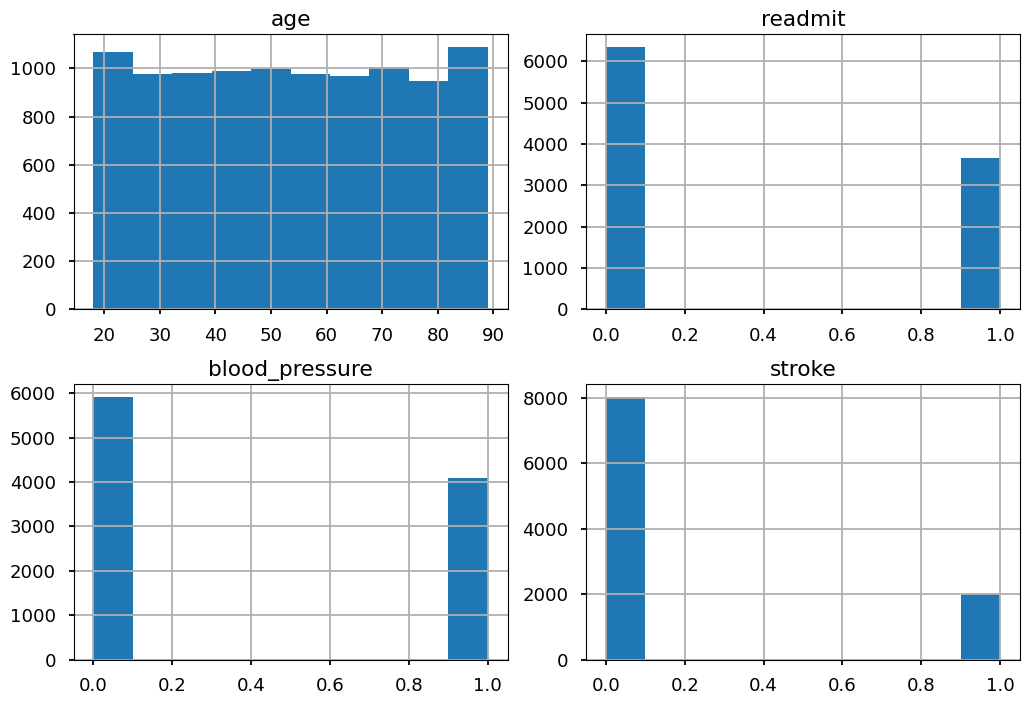

In [16]:
# Create a graph of the cleaned data set

plt.style.use('seaborn-talk')
df.hist()
plt.tight_layout()
plt.show()

## Analysis

### Split the data into training and test data sets
<p>Splitting the data into training and test data sets includes the following steps:</p>

<p><strong>Step One</strong>
<ul>
    <li>Load the clean CSV into a new DataFrame</li>
</ul>
<strong>Step One Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [18]:
# Load clean csv into a new DataFrame

patient_df=pd.read_csv('clean_data.csv')

<p><strong>Step Two</strong>
<ul>
    <li>Move the <em>Target Variable</em> to the end of the DataFrame so it can be easily excluded when necessary.</li>
</ul>
<strong>Step Two Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [19]:
# Move the target variable to the end of the dataframe

df_reorg=[col for col in patient_df.columns if col != 'readmit'] + ['readmit']
patient_df=patient_df[df_reorg]

<p><strong>Step Three</strong>
<ul>
    <li>Split the data into <em>train</em> and <em>test</em> data sets.</li>
</ul>

<strong>Step Three Imports</strong><br>
<ul>
    <li>train_test_split from SciKitLearn's model_selection to train, test, and split the dataset.</li>
</ul></p>

In [20]:
# Import train_test_split from SkiKitLearn's model_selection

from sklearn.model_selection import train_test_split

In [21]:
# Split the data into train and test data sets

X=patient_df.drop(['readmit'], axis=1)
y=patient_df.readmit
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.20, random_state=21, stratify=y)
print("The Feature Dimension is: ", X.shape) 

The Feature Dimension is:  (10000, 4)


In [22]:
print(X)

      CaseOrder  age  blood_pressure  stroke
0             1   53               1       0
1             2   51               1       0
2             3   53               1       0
3             4   78               0       1
4             5   22               0       0
...         ...  ...             ...     ...
9995       9996   25               1       0
9996       9997   87               1       0
9997       9998   45               1       0
9998       9999   43               0       0
9999      10000   70               0       0

[10000 rows x 4 columns]


<p><strong>Step Four</strong>
<ul>
    <li>Create train data sets.</li>
    <ul>
    <li>Save train data sets to CSV.</li>
    </ul><br>
    <li>Create test data sets.</li>
    <ul>
    <li>Save test data sets to CSV.</li>
    </ul>
</ul>

<strong>Step Four Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [23]:
# Create train data sets and save to CSV

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

In [24]:
# Create test data sets and save to CSV

X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

### K-nearest Neighbors

<p><strong>Step One</strong><br>
<ul>
    <li>Run model with k-value of 3.</li>
    <li>Run model with k-value of 5.</li>
    <li>Run model with k-value of 9.</li>
</ul>

<strong>Step One Imports</strong><br>
<ul>
    <li>KNeighborsClassifier from SciKitLearn's neighbors to use KNN.</li>
    <li>accuracy_score from SciKitLearn's metrics to get the accuracy score of the models.</li>
</ul></p>

In [25]:
# Import KNeighborsClassifier from SciKitLearn's neighbors.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Run model with k-value of 3

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('The Accuracy Score is:', accuracy_score(y_test, y_pred)*100,'%')

The Accuracy Score is: 83.2 %


In [27]:
# Run model with k-value of 5

knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)
y_pred2=knn2.predict(X_test)
print('The Accuracy Score is:', accuracy_score(y_test, y_pred2)*100,'%')

The Accuracy Score is: 84.85000000000001 %


In [28]:
# Run model with k-value of 9

knn3=KNeighborsClassifier(n_neighbors=9)
knn3.fit(X_train, y_train)
y_pred3=knn3.predict(X_test)
print('The Accuracy Score is:', accuracy_score(y_test, y_pred3)*100,'%')

The Accuracy Score is: 86.45 %


<p><strong>Step Two</strong>
<ul>
    <li>Find the square root of X_Train.</li>
    <li>Find optimal value of <em>k</em> using the square root of <em>X_Train</em>.</li>
</ul>
    
<strong>Step Two</strong>
<ul>
    <li>numpy to perform mathematical operations.</li>
    <li>array from numpy to create an array.</li>
    <li>KNeighborsRegressor from SciKitLearn's neighbors to perform regression on the model.</li>
</ul>
</p>

In [29]:
# Import numpy

import numpy as np
from numpy import array

from sklearn.neighbors import KNeighborsRegressor

In [30]:
# Find the square root of x_train

k_sqrt=round(np.sqrt(len(X_train)))
print('The square root of x_train is:', k_sqrt)

The square root of x_train is: 89


In [31]:
# Find the optimal value of k using the square root of X_Train

knn_arr=[]

for i in range(1,k_sqrt,2):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    test_score=knn.score(X_test, y_test)
    train_score=knn.score(X_train, y_train)
    
    knn_arr.append((i, test_score, train_score))

knn_arr_df=pd.DataFrame(knn_arr, columns=['k', 'Test Score', 'Train Score'])
print(knn_arr_df)

     k  Test Score  Train Score
0    1    0.179979     1.000000
1    3    0.460015     0.717233
2    5    0.518318     0.655908
3    7    0.542793     0.632576
4    9    0.555619     0.621176
5   11    0.561663     0.615717
6   13    0.563302     0.611195
7   15    0.567161     0.607960
8   17    0.570094     0.605420
9   19    0.574199     0.602077
10  21    0.576741     0.600281
11  23    0.577997     0.598091
12  25    0.580542     0.595879
13  27    0.582335     0.594750
14  29    0.582195     0.593131
15  31    0.583464     0.590717
16  33    0.584771     0.589397
17  35    0.585417     0.589314
18  37    0.585153     0.588991
19  39    0.584367     0.588701
20  41    0.583328     0.588280
21  43    0.584233     0.587698
22  45    0.583633     0.586800
23  47    0.583730     0.586298
24  49    0.584136     0.585451
25  51    0.583762     0.584268
26  53    0.583898     0.583125
27  55    0.583558     0.583004
28  57    0.584036     0.582557
29  59    0.584537     0.582139
30  61  

In [32]:
# Display results

opt_k_val=knn_arr_df['k'].iloc[-1]

print('The optimal value of k is', opt_k_val)

The optimal value of k is 87


<p><strong>Step Three</strong>
<ul>
    <li>Run the model using the optimal value of k.</li>
</ul>
<strong>Step Three Imports</strong><br>
<sub>No additional imports used.</sub></p>

In [33]:
# Train model using optimal value of k

knn_opt=KNeighborsClassifier(n_neighbors=opt_k_val)
opt_model=knn_opt.fit(X_train, y_train)
y_pred_opt=opt_model.predict(X_test)

<p><strong>Step Four</strong>
<ul>
    <li>Create a Classification Report for Evaluation.</li>
    <li>Check the Accuracy Score.</li>
    <li>Check the Recall Score.</li>
</ul>
<strong>Step Four Imports</strong><br>
<ul>
    <li>classification_report from SciKitLearn's metrics to create a classification report.</li>
    <li>recall_score from SciKitLearn's metrics to check the model's recall score.</li>
</ul>
</p>

In [34]:
# Import classification_report and recall_score

from sklearn.metrics import (
    classification_report
    ,recall_score)

In [35]:
# Create classification report for evaluation

print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1266
           1       0.74      1.00      0.85       734

    accuracy                           0.87      2000
   macro avg       0.87      0.90      0.87      2000
weighted avg       0.90      0.87      0.87      2000



In [36]:
# Check the Accuracy Score

accuracy_pct = accuracy_score(y_test, y_pred_opt)
print('The Accuracy Score is:', accuracy_pct*100,'%')

The Accuracy Score is: 87.1 %


In [37]:
# Check the Recall Score

recall_pct = recall_score(y_test, y_pred_opt)
print('The Recall Score is:', recall_pct*100,'%')

The Recall Score is: 99.72752043596729 %


<strong>Step Five</strong>
    <ul>
        <li>Create a Confusion Matrix.</li>
        <li>Create a HeatMap of the Confusion Matrix.</li>
    </ul>
    
<strong>Step Five Imports</strong>
    <ul>
        <li>confusion_matrix from SciKitLearn's matrix package to create a confusion matrix.</li>
        <li>Seaborn to create a heatmap of the confusion matrix.</li>
    </ul>

In [38]:
# Import confusion_matrix

from sklearn.metrics import confusion_matrix

import seaborn as sns

In [39]:
# Create a Confusion Matrix

matrix=confusion_matrix(y_test, y_pred_opt)
print(matrix)

[[1010  256]
 [   2  732]]


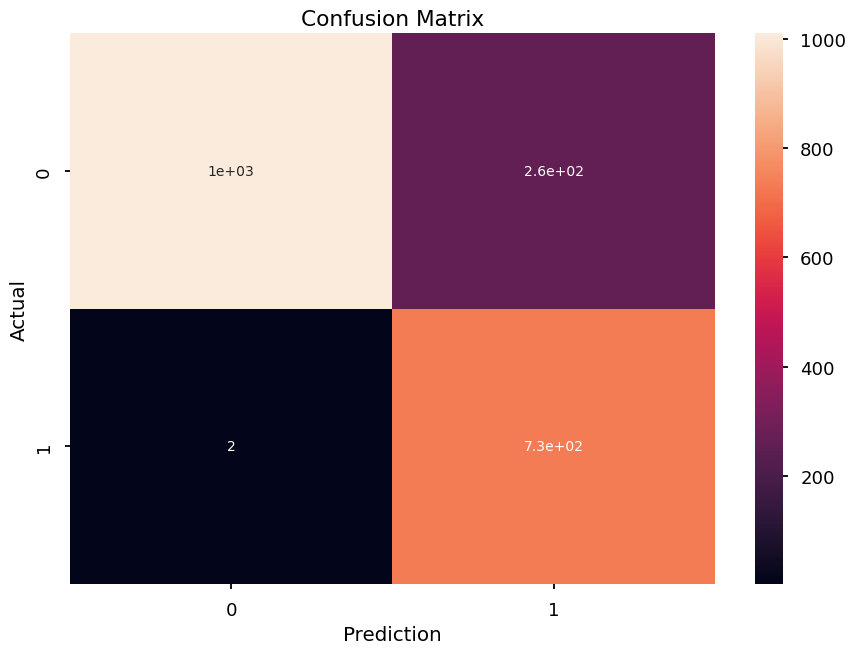

In [40]:
# Create a HeatMap of the Confusion Matrix

n_matrix=confusion_matrix(y_test, y_pred_opt)
sns.heatmap(n_matrix, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary and Implications

### Accuracy and Area Under the Curve (AUC)


<strong>Imports</strong>
    <ul>
        <li>roc_curve from SciKitLearn's metrics package to create the roc curve.</li>
        <li>roc_auc_score from SciKitLearn's metrics package to check the auc score.</li>
    </ul>

In [41]:
# Import roc_curve and roc_auc_score

from sklearn.metrics import(
    roc_curve
    ,roc_auc_score
    ,precision_score
    ,f1_score)

In [42]:
# Check the AUC Score

y_prob=opt_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds=roc_curve(y_test, y_prob, pos_label=1)

random_probs=[0 for i in range(len(y_test))]
p_fpr, p_tpr, _ =roc_curve(y_test, random_probs, pos_label=1)
auc_score=round(roc_auc_score(y_test, y_prob),5)

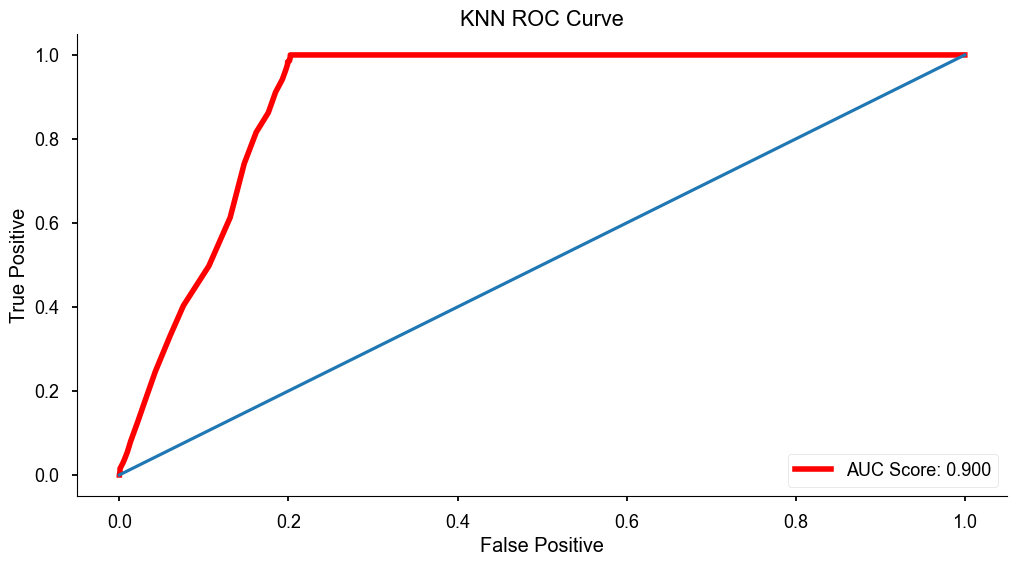

In [43]:
# Plot the AUC Score

plt.figure(figsize=(12,6))
plt.title('KNN ROC Curve')
# plt.plot(fpr, tpr, auc_score)
plt.plot(fpr, tpr, 'r', label='AUC Score: %0.3f' % auc_score, lw=4)
plt.plot(p_fpr, p_tpr)
plt.legend()
plt.xlabel('False Positive')
plt.ylabel('True Positive')

sns.despine()
sns.set_style("darkgrid")

plt.show()


In [44]:
print('The Accuracy Score is: %.3f' % accuracy_score(y_test, y_pred_opt))

The Accuracy Score is: 0.871


In [45]:
print('The AUC score is:', (auc_score)*100,'%')

The AUC score is: 89.992 %


<p>The accuracy score suggests the model will make a correct classification 87.1% of the time.<br>
The AUC Score suggests the model can distinguish true positive and true negatives 89.99% of the time.<br>
The Accuracy Score and AUC Score may not be the best way to determine the model's usefulness. The best score to use in answering the business question is discussed in more detail below.</p>

## Results and Implications

<p>The test and training models resulted in the following Accuracy Scores:</p>

In [46]:
print('    Test Model Accuracy Score:', (knn_opt.score(X_test, y_test))*100, '%')
print('Training Model Accuracy Score:', (knn_opt.score(X_train, y_train))*100, '%')

    Test Model Accuracy Score: 87.1 %
Training Model Accuracy Score: 86.5125 %


<p><strong>Model Precision Score Results</strong></p>

In [47]:
print('The model Precision Score is: %.3f' % precision_score(y_test, y_pred_opt))

The model Precision Score is: 0.741


<p>The model has a relatively low precision score.<br>
    The low score suggests the model is predicting some false positives during the analysis.</p>

<p><strong>Model Recall Score Results</strong></p>

In [48]:
print('The model Recall Score is: %.3f' % recall_score(y_test, y_pred_opt))

The model Recall Score is: 0.997


<p>The model has a very high Recall Score.<br>
The high recall score suggests the model is identifying true positive results to a high degree of accuracy.</p>

<p><strong>Model Accuracy Score Results</strong></p>

In [49]:
print('The model Accuracy Score is: %.3f' % accuracy_score(y_test, y_pred_opt))

The model Accuracy Score is: 0.871


<p>The accuracy score suggests the model will make a correct prediction 87.1% of the time.</p>

<p><strong>Model F1 Score Results</strong></p>

In [50]:
print('       F1 Score: %.3f' % f1_score(y_test, y_pred_opt))

       F1 Score: 0.850


<p>The F1 Score is a balance of the recall and precision score.</p>

<strong>Overall Results</strong>
<p>The goal of the analysis is to determine which variables can predict whether a patient will be readmitted, which involves medical decision-making. According to data analyst Ajitesh Kumar, a model's Recall Score should be "extremely high" when used in medical diagnosis. A low Recall Score would suggest a high number of false negatives, meaning "some patients who are positive are termed as falsely negative" and would lead to patients failing to receive the care they need (Kumar. 2023). Since the goal of the analysis involves medical diagnosis and decision making, the Recall Score should be used when considering whether the analysis was useful.</p>

### Limitation of the Analysis
<p>Finding the optimal value of k is a limitation of the data analysis.<br>
The results of KNN can be significantly affected by the value supplied for k. Providing too many values may lead to overfitting. The model might also result in underfitting if the k value is too low.<br>
I believe the limitation was by-passed by the methods performed in part two of the data analysis, where the optimal value of k was calculated.</p>

### Recommended Course of Action
<p>The model involves medical diagnoses and healthcare decisions, so the Recall Score should be used to determine the implications. <br>The model has a very high Recall Score of .997, meaning it can predict a True Positive result 99.7% of the time. The model suggests that a combination of patient age, blood pressure diagnosis, and stroke diagnosis can predict whether a patient would be readmitted.<br>
I would suggest the organization use these results to provide additional care to patients fitting this criteria as needed. Providing the additional care during the patient's initial stay could prevent the patient from being readmitted within 30 days, saving the organization time, money, and resources.</p>

#### References:
<ul>
    <li>Bruce, P., Bruce, A., & Gedeck, P. (2020).<em> Practical statistics for data scientists : 50+ essential concepts using r and python.</em> O'Reilly Media, Incorporated.</li>
    <li>Kumar, Ajitesh. (2023). <em>Accuracy, Precision, Recall & F1-Score – Python Examples.</em> VitaFlux.com. vitalflux.com/accuracy-precision-recall-f1-score-python-example</li>
</ul>